### In order to understand the politics pages’ behaviours in social platforms, we used the data  scraped through facebook api back in 2016 for answer the following questions. Notice that during that period is president election time.
#### Does fake news get more attention in terms of sharing, reacting or commenting?
#### Which newspaper is relatively more trustworthy in terms of less fake news and more true stories?
#### In what kind of form (links/video/text/photo), does fake news more likely be shown as?
#### Considering different parties, which party got more fake news than others?
#### Which party’s news got more attention in terms of sharing,  reacting or commenting?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import and display data

In [2]:
data = pd.read_csv("facebook-fact-check.csv", index_col=0)
data.shape

(2282, 11)

In [3]:
data.head()

,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
account_id,,,,,,,,,,,
184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


In [4]:
# check missing data from original dataset
data.isnull().sum()

post_id              0
Category             0
Page                 0
Post URL             0
Date Published       0
Post Type            0
Rating               0
Debate            1984
share_count         70
reaction_count       2
comment_count        2
dtype: int64

In [5]:
#check each column's data type
data.dtypes

post_id             int64
Category           object
Page               object
Post URL           object
Date Published     object
Post Type          object
Rating             object
Debate             object
share_count       float64
reaction_count    float64
comment_count     float64
dtype: object

In [6]:
#fill missing value in column Debate with 'No'
data['Debate'].fillna('No', inplace=True)
data.head()

,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
account_id,,,,,,,,,,,
184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,No,NaN,146.0,15.0
184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,No,1.0,33.0,34.0
184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,No,34.0,63.0,27.0
184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,No,35.0,170.0,86.0
184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,No,568.0,3188.0,2815.0


In [7]:
#check whether the missing value in share_count, reaction_count, comment_count means 0 or not
def countZeros(data, a):
    Sum = 0
    for index, row in data.iterrows():
        if row[a] == 0:
            Sum += 1
        else:
            continue
    return Sum

In [8]:
print('share_count', countZeros(data, 'share_count'))
print('reaction_count', countZeros(data, 'reaction_count'))
print('comment_count', countZeros(data, 'comment_count'))

share_count 0
reaction_count 0
comment_count 8


In [9]:
#since the there are 0 in comment_count, we should not see the missing values as 0
#but we only need to analyze the existing values

In [10]:
#check how many categories are in the dataset
print(data['Category'].unique().tolist())
# check how many newssources are in the dataset
print(data['Page'].unique().tolist())
# check how many post types are in the dataset
print(data['Post Type'].unique().tolist())
# check how many truth rating categories are in the dataset
print(data['Rating'].unique().tolist())

['mainstream', 'left', 'right']
['ABC News Politics', 'Addicting Info', 'CNN Politics', 'Eagle Rising', 'Freedom Daily', 'Occupy Democrats', 'Politico', 'Right Wing News', 'The Other 98%']
['video', 'link', 'text', 'photo']
['no factual content', 'mostly true', 'mixture of true and false', 'mostly false']


In [11]:
data.head()

,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
account_id,,,,,,,,,,,
184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,No,NaN,146.0,15.0
184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,No,1.0,33.0,34.0
184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,No,34.0,63.0,27.0
184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,No,35.0,170.0,86.0
184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,No,568.0,3188.0,2815.0


### Analysis of truth rating

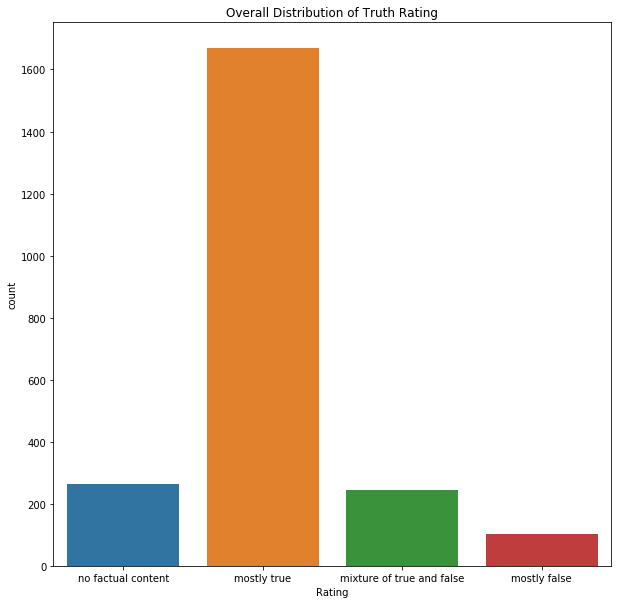

In [44]:
plt.figure(figsize=(10, 10))
#plt.tight_layout()
sns.countplot(data['Rating'])
plt.title('Overall Distribution of Truth Rating')
plt.savefig('1.png')

In [13]:
#Most posts in Facebook are true, only a small portion is fake news. The reason of this is Facebook has paid attention to remove fake news.

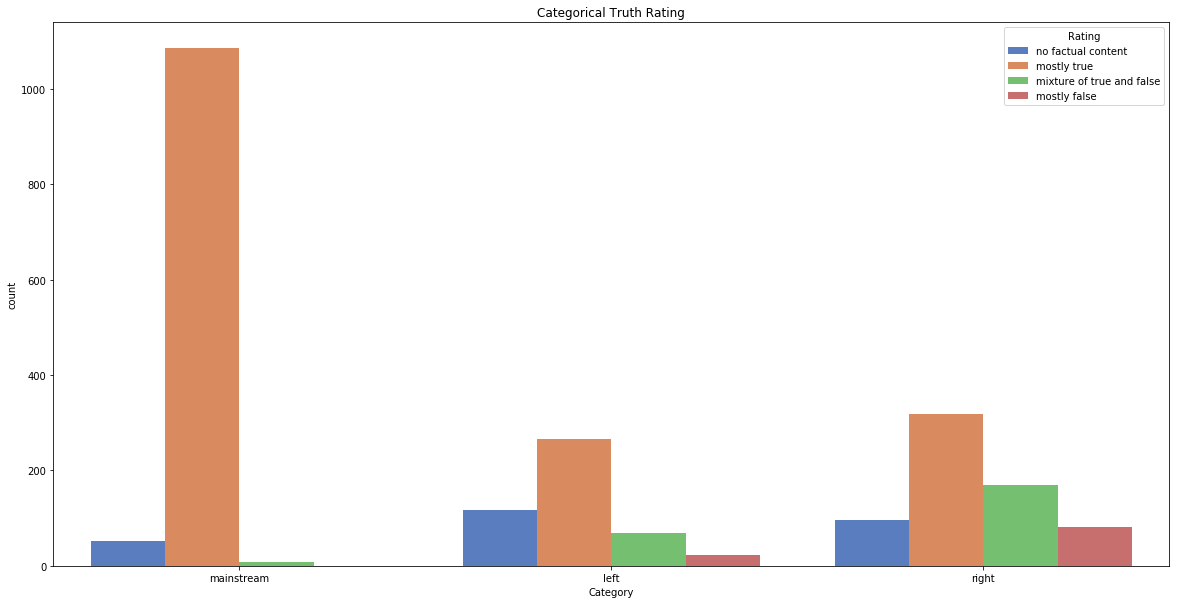

In [45]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Category", hue="Rating", data=data, palette = 'muted')
plt.title('Categorical Truth Rating')
plt.savefig('2.png')

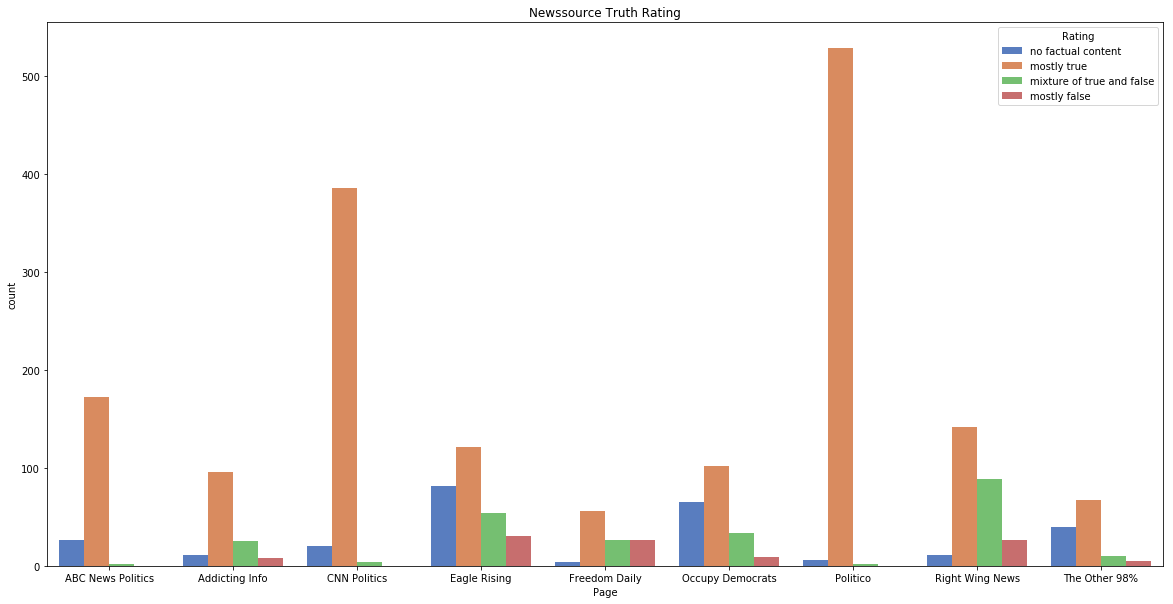

In [46]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Page", hue="Rating", data=data, palette = 'muted')
plt.title('Newssource Truth Rating')
plt.savefig('3.png')

In [16]:
# We can see from the original dataset that mainstream newssource include ABC News Politics, CNN Politics, Politico;
# right newssource include Eagle Rising, Freedom Daily, Right Wing News 
#left newssource include Addicting Info, Occupy Democrats, The Other 98%

In [17]:
dfLeft = data.loc[data['Category'] == 'left']
dfRight = data.loc[data['Category'] == 'right']
dfMainstream = data.loc[data['Category'] == 'mainstream']

In [18]:
data.groupby('Page')['Rating'].value_counts()

Page               Rating                   
ABC News Politics  mostly true                  172
                   no factual content            26
                   mixture of true and false      2
Addicting Info     mostly true                   96
                   mixture of true and false     25
                   no factual content            11
                   mostly false                   8
CNN Politics       mostly true                  385
                   no factual content            20
                   mixture of true and false      4
Eagle Rising       mostly true                  121
                   no factual content            81
                   mixture of true and false     54
                   mostly false                  30
Freedom Daily      mostly true                   56
                   mixture of true and false     26
                   mostly false                  26
                   no factual content             4
Occupy Democrats   

In [19]:
def fakepercentages(data, a):
    total = 0
    fake_sum = 0
    for index, row in data.iterrows():
        if row['Page'] == a:
            total += 1
            if row['Rating'] == 'mixture of true and false' or row['Rating'] == 'mostly false':
                fake_sum += 1
            else:
                continue
    fake_percentage = fake_sum/total
    return fake_percentage

In [20]:
#check which left party newssource post most fake news
print('fake news percentage of Addicting Info:',fakepercentages(dfLeft, 'Addicting Info'))
print('fake news percentage of Occupy Democrats:',fakepercentages(dfLeft, 'Occupy Democrats'))
print('fake news percentage of The Other 98%:',fakepercentages(dfLeft, 'The Other 98%'))

fake news percentage of Addicting Info: 0.2357142857142857
fake news percentage of Occupy Democrats: 0.20095693779904306
fake news percentage of The Other 98%: 0.12295081967213115


In [21]:
#check which right party newssource post most fake news
print('fake news percentage of Eagle Rising:',fakepercentages(dfRight, 'Eagle Rising'))
print('fake news percentage of Freedom Daily:',fakepercentages(dfRight, 'Freedom Daily'))
print('fake news percentage of Right Wing News:',fakepercentages(dfRight, 'Right Wing News'))

fake news percentage of Eagle Rising: 0.2937062937062937
fake news percentage of Freedom Daily: 0.4642857142857143
fake news percentage of Right Wing News: 0.4291044776119403


### Analysis of engagement

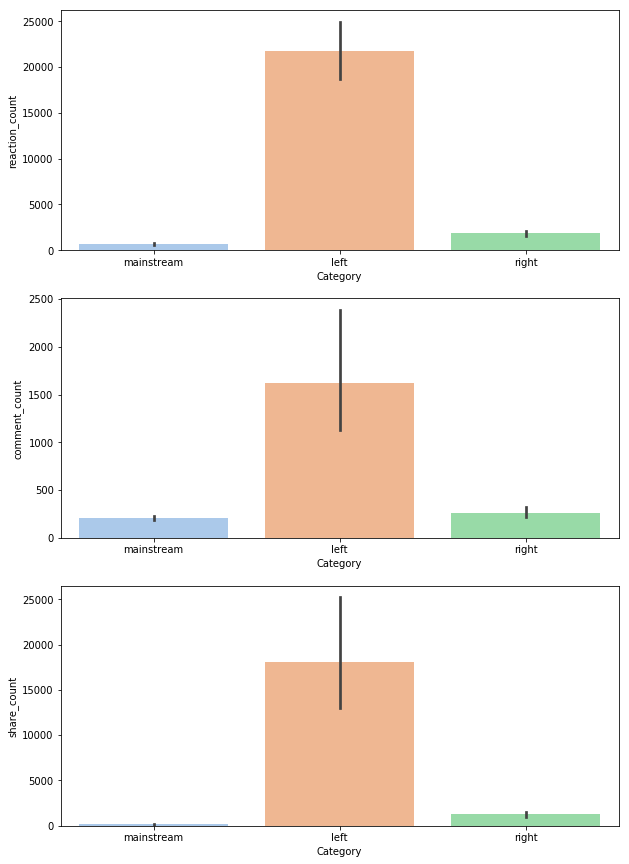

In [55]:
fig = plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.barplot(x="Category", y="reaction_count", data=data, ax=ax1, palette = 'pastel')
sns.barplot(x="Category", y="comment_count", data=data, ax=ax2, palette = 'pastel')
sns.barplot(x="Category", y="share_count", data=data, ax=ax3, palette = 'pastel')
plt.savefig('4.png')

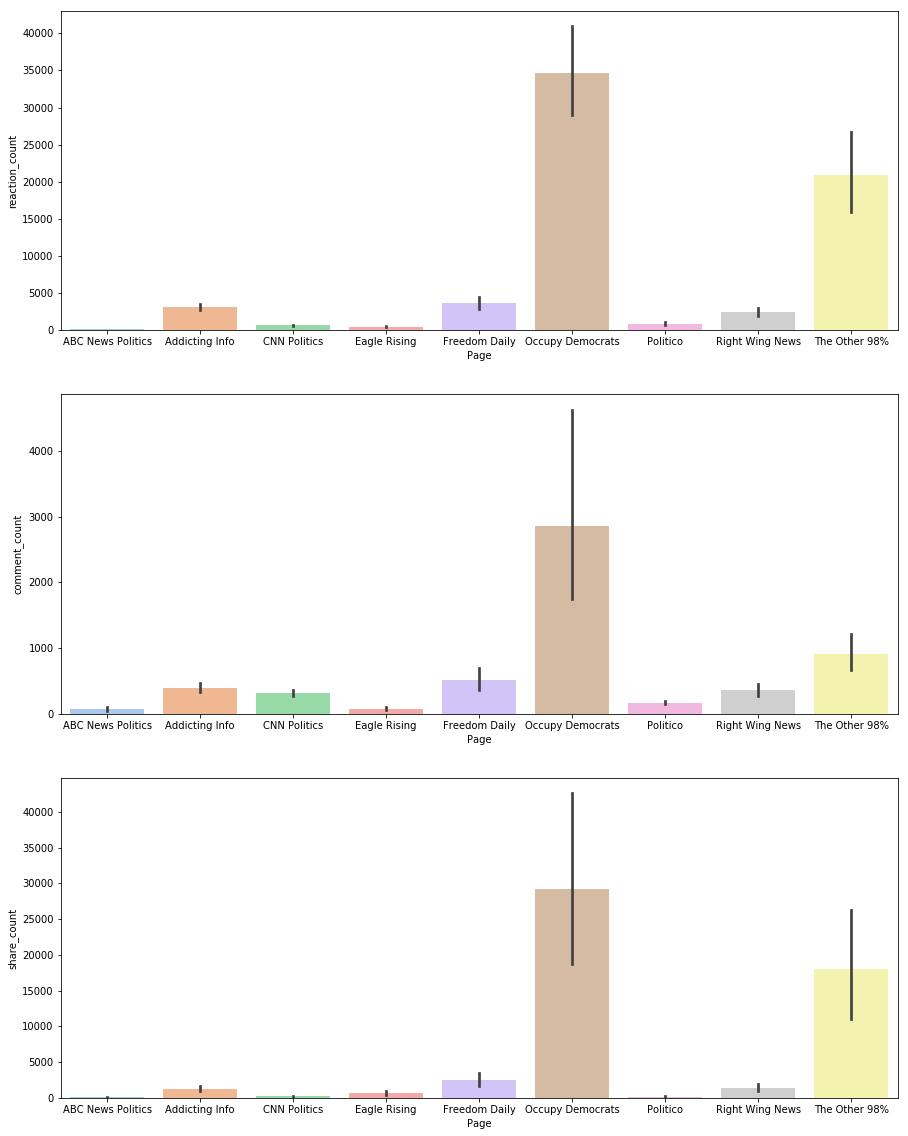

In [48]:
fig = plt.figure(figsize=(15, 20))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.barplot(x="Page", y="reaction_count", data=data, ax=ax1, palette = 'pastel')
sns.barplot(x="Page", y="comment_count", data=data, ax=ax2, palette = 'pastel')
sns.barplot(x="Page", y="share_count", data=data, ax=ax3, palette = 'pastel')
plt.savefig('5.png')

In [24]:
data['total_engagement'] = data[['share_count', 'reaction_count', 'comment_count']].sum(1)

In [25]:
data.head()

,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count,total_engagement
account_id,,,,,,,,,,,,
184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,No,NaN,146.0,15.0,161.0
184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,No,1.0,33.0,34.0,68.0
184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,No,34.0,63.0,27.0,124.0
184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,No,35.0,170.0,86.0,291.0
184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,No,568.0,3188.0,2815.0,6571.0


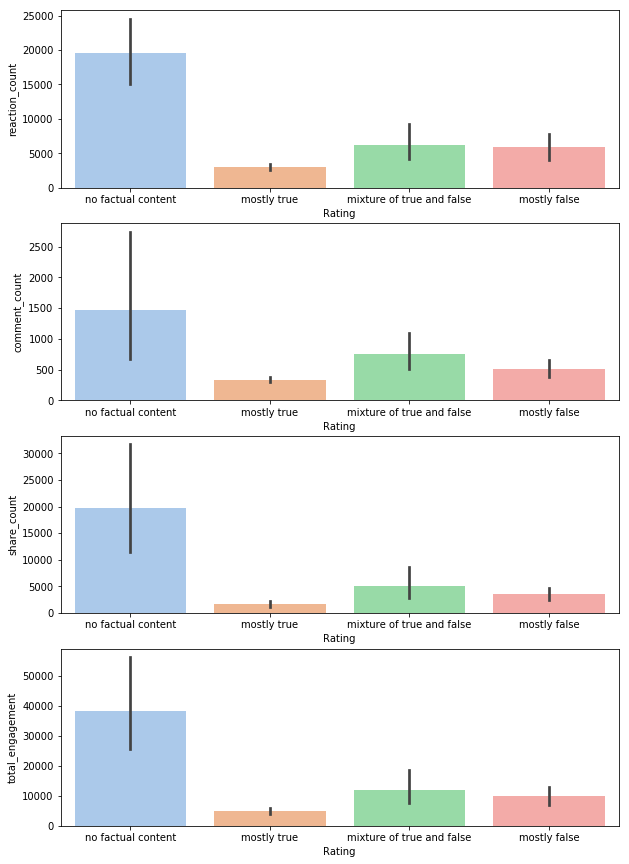

In [49]:
fig = plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.barplot(x="Rating", y="reaction_count", data=data, ax=ax1, palette = 'pastel')
sns.barplot(x="Rating", y="comment_count", data=data, ax=ax2, palette = 'pastel')
sns.barplot(x="Rating", y="share_count", data=data, ax=ax3, palette = 'pastel')
sns.barplot(x="Rating", y="total_engagement", data=data, ax=ax4, palette = 'pastel')
plt.savefig('6.png')

### Analysis of content type

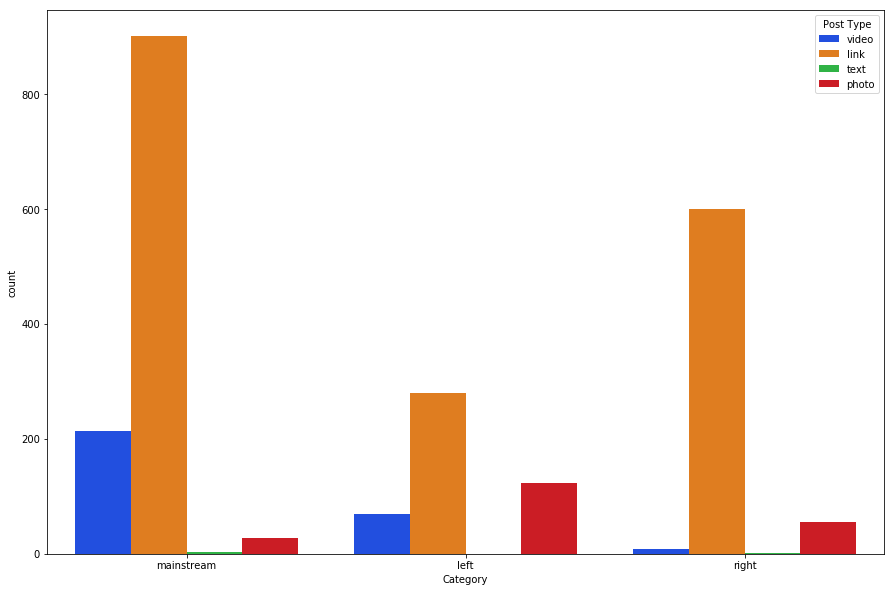

In [27]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Category", hue="Post Type", data=data, palette = 'bright')

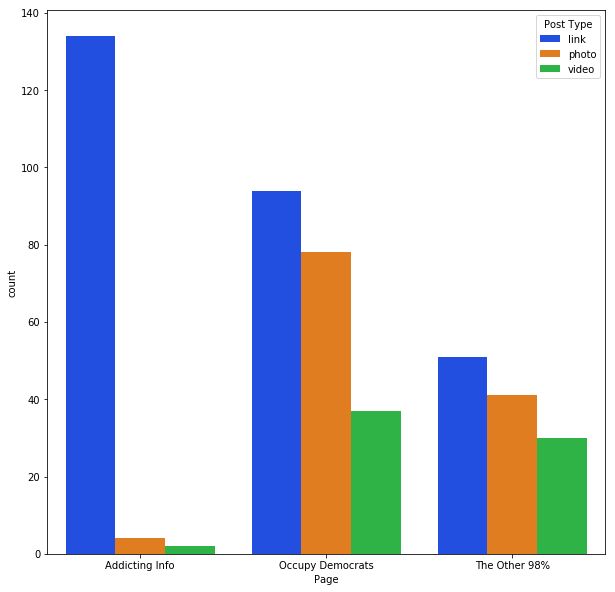

In [50]:
plt.figure(figsize=(10, 10))
sns.countplot(x="Page", hue="Post Type", data=dfLeft, palette = 'bright')
plt.savefig('7.png')

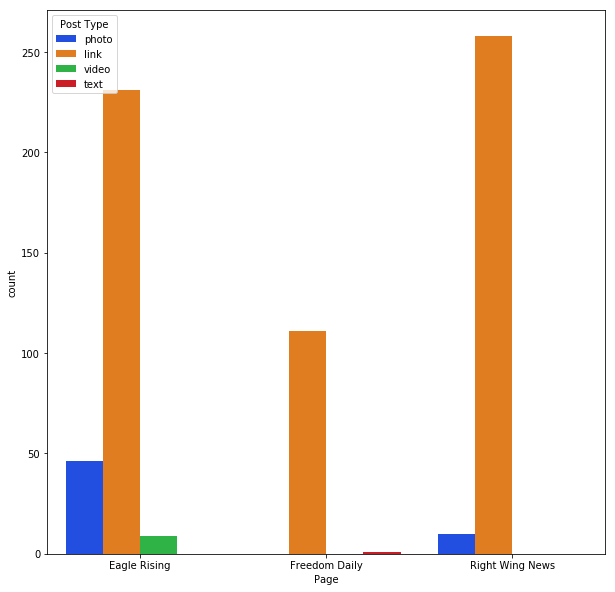

In [51]:
plt.figure(figsize=(10, 10))
sns.countplot(x="Page", hue="Post Type", data=dfRight, palette = 'bright')
plt.savefig('8.png')

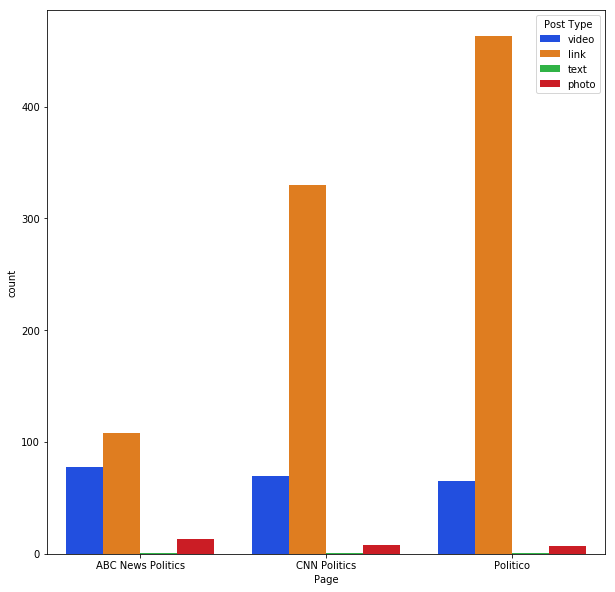

In [52]:
plt.figure(figsize=(10, 10))
sns.countplot(x="Page", hue="Post Type", data=dfMainstream, palette = 'bright')
plt.savefig('9.png')

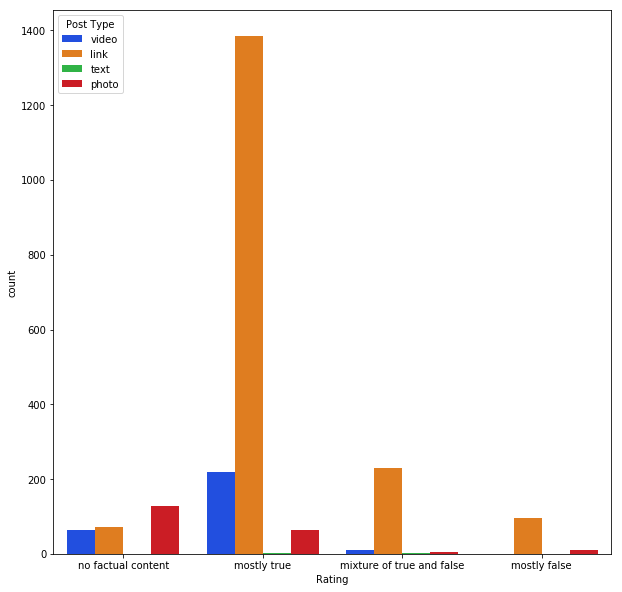

In [53]:
plt.figure(figsize=(10, 10))
sns.countplot(x="Rating", hue="Post Type", data=data, palette = 'bright')
plt.savefig('10.png')

### Analysis of the two pages that get most engagement from left or right party, in terms of post type and truth rating and engagement 

In [32]:
dfOccupy = data.loc[data['Page'] == 'Occupy Democrats']
dfFreedomDaily = data.loc[data['Page'] == 'Freedom Daily']

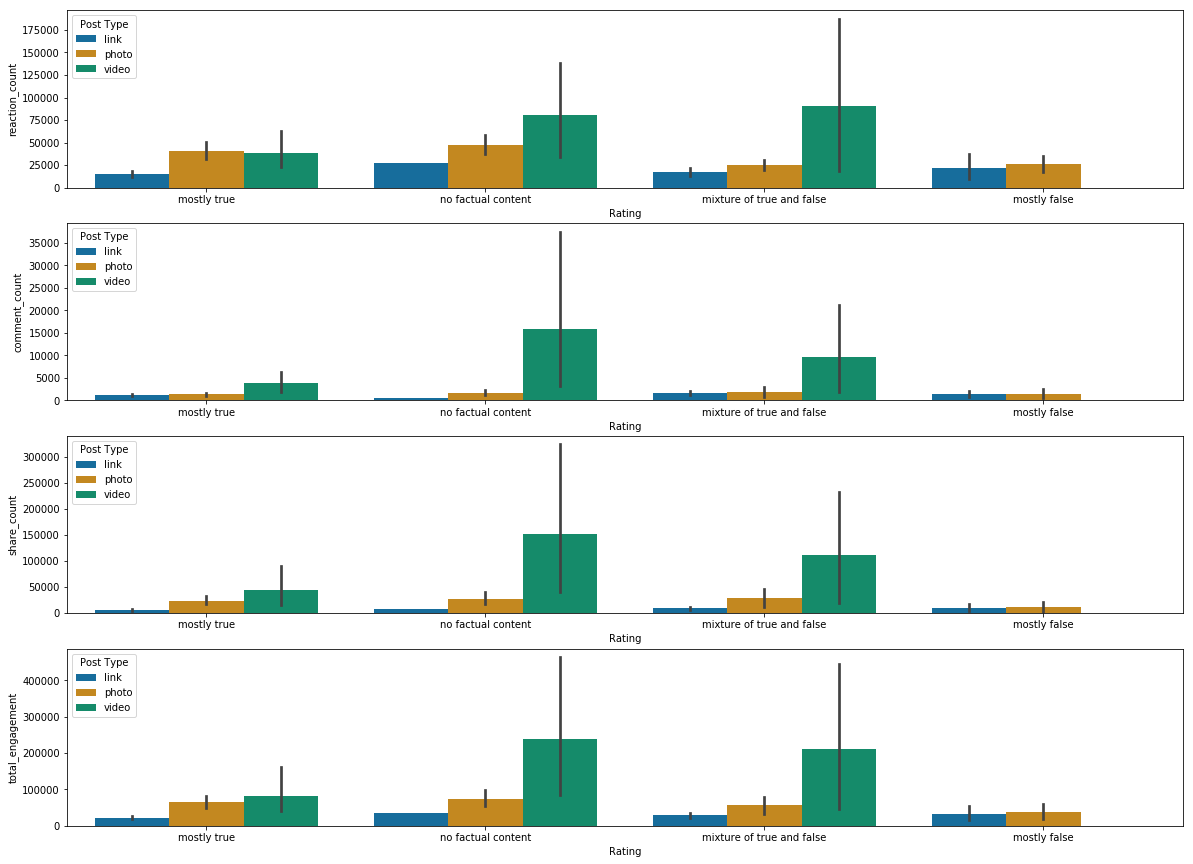

In [56]:
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.barplot(x="Rating", y="reaction_count",hue="Post Type", data=dfOccupy, ax=ax1, palette = 'colorblind')
sns.barplot(x="Rating", y="comment_count",hue="Post Type", data=dfOccupy, ax=ax2, palette = 'colorblind')
sns.barplot(x="Rating", y="share_count",hue="Post Type", data=dfOccupy, ax=ax3, palette = 'colorblind')
sns.barplot(x="Rating", y="total_engagement",hue="Post Type", data=dfOccupy, ax=ax4, palette = 'colorblind')
plt.savefig('11.png')

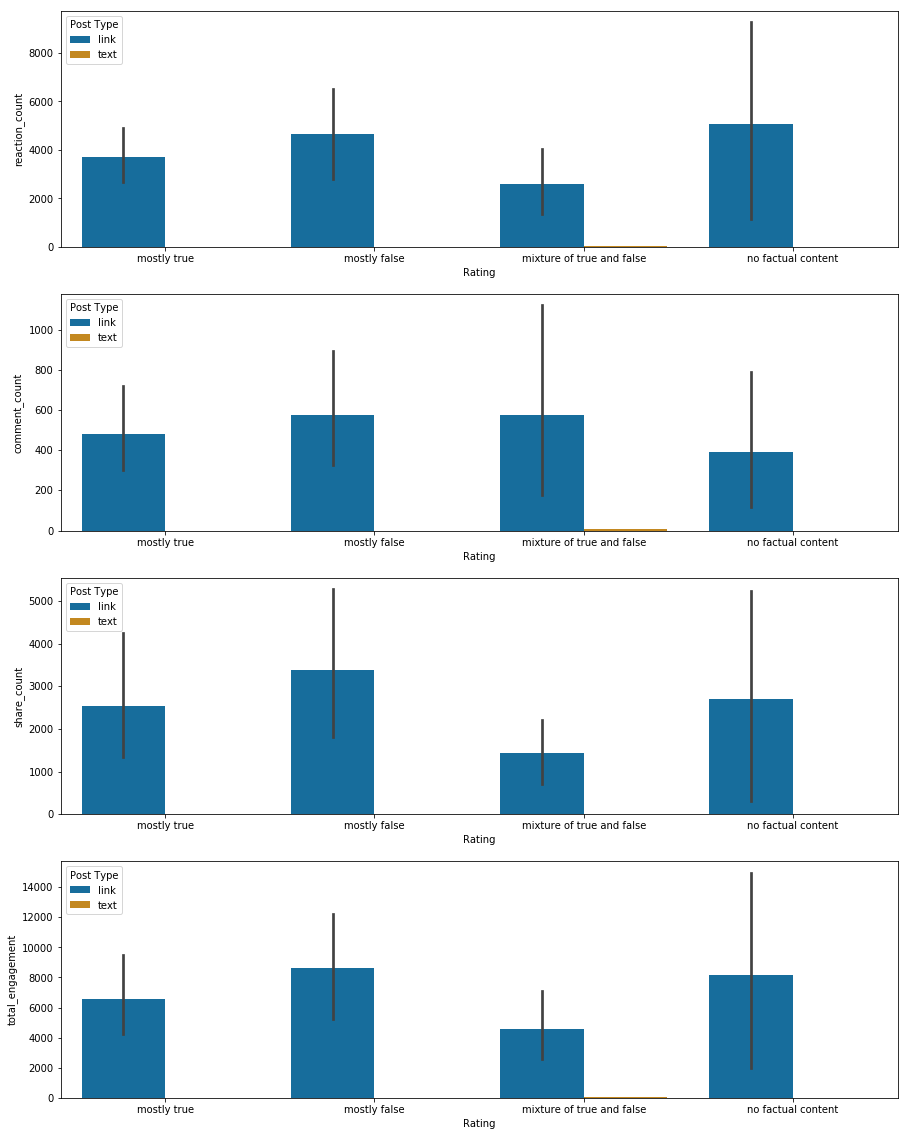

In [57]:
fig = plt.figure(figsize=(15, 20))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.barplot(x="Rating", y="reaction_count",hue="Post Type", data=dfFreedomDaily, ax=ax1, palette = 'colorblind')
sns.barplot(x="Rating", y="comment_count",hue="Post Type", data=dfFreedomDaily, ax=ax2, palette = 'colorblind')
sns.barplot(x="Rating", y="share_count",hue="Post Type", data=dfFreedomDaily, ax=ax3, palette = 'colorblind')
sns.barplot(x="Rating", y="total_engagement",hue="Post Type", data=dfFreedomDaily, ax=ax4, palette = 'colorblind')
plt.savefig('12.png')

### Analysis the relationship between truth rating and debate

In [35]:
data.groupby('Rating')['Debate'].value_counts()

Rating                     Debate
mixture of true and false  No         230
                           yes         15
mostly false               No          97
                           yes          7
mostly true                No        1433
                           yes        236
no factual content         No         224
                           yes         40
Name: Debate, dtype: int64

### Analysis the most engament posts

In [39]:
data['engagement_rank'] = data['total_engagement'].rank(ascending=False)
data.head()

,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count,total_engagement,engagement_rank
account_id,,,,,,,,,,,,,
184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,No,NaN,146.0,15.0,161.0,1845.0
184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,No,1.0,33.0,34.0,68.0,2124.0
184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,No,34.0,63.0,27.0,124.0,1952.5
184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,No,35.0,170.0,86.0,291.0,1619.5
184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,No,568.0,3188.0,2815.0,6571.0,428.0


In [37]:
data_top_engagement = data.loc[data['engagement_rank'] <= 50]
data_top_engagement

,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count,total_engagement,engagement_rank
account_id,,,,,,,,,,,,,
346937065399354,1245466285546423,left,Occupy Democrats,https://www.facebook.com/OccupyDemocrats/posts...,2016-09-19,video,no factual content,No,121577.0,54024.0,9549.0,185150.0,14.0
346937065399354,1245835812176137,left,Occupy Democrats,https://www.facebook.com/OccupyDemocrats/posts...,2016-09-19,video,mostly true,No,63291.0,30011.0,13510.0,106812.0,33.0
346937065399354,1245894178836967,left,Occupy Democrats,https://www.facebook.com/OccupyDemocrats/posts...,2016-09-19,photo,mixture of true and false,No,46108.0,31113.0,2988.0,80209.0,47.0
346937065399354,1245781955514856,left,Occupy Democrats,https://www.facebook.com/OccupyDemocrats/posts...,2016-09-20,photo,mostly true,No,46081.0,55197.0,3296.0,104574.0,34.0
346937065399354,1245904742169244,left,Occupy Democrats,https://www.facebook.com/OccupyDemocrats/posts...,2016-09-20,photo,no factual content,No,18396.0,95902.0,3754.0,118052.0,28.0
346937065399354,1246648265428225,left,Occupy Democrats,https://www.facebook.com/OccupyDemocrats/posts...,2016-09-20,photo,mostly true,No,41515.0,67257.0,1264.0,110036.0,31.0
346937065399354,1246675775425474,left,Occupy Democrats,https://www.facebook.com/OccupyDemocrats/posts...,2016-09-20,video,mixture of true and false,No,347294.0,293333.0,32419.0,673046.0,2.0
346937065399354,1247448632014855,left,Occupy Democrats,https://www.facebook.com/OccupyDemocrats/posts...,2016-09-21,video,no factual content,No,1088995.0,456458.0,159047.0,1704500.0,1.0
346937065399354,1247597115333340,left,Occupy Democrats,https://www.facebook.com/OccupyDemocrats/posts...,2016-09-21,video,no factual content,No,36725.0,79872.0,2777.0,119374.0,27.0


In [43]:
pd.set_option('display.max_colwidth', -1)
df1 = data_top_engagement[['Post URL','engagement_rank']]
df1

,Post URL,engagement_rank
account_id,,
346937065399354,https://www.facebook.com/OccupyDemocrats/posts/1245466285546423,14.0
346937065399354,https://www.facebook.com/OccupyDemocrats/posts/1245835812176137,33.0
346937065399354,https://www.facebook.com/OccupyDemocrats/posts/1245894178836967,47.0
346937065399354,https://www.facebook.com/OccupyDemocrats/posts/1245781955514856,34.0
346937065399354,https://www.facebook.com/OccupyDemocrats/posts/1245904742169244,28.0
346937065399354,https://www.facebook.com/OccupyDemocrats/posts/1246648265428225,31.0
346937065399354,https://www.facebook.com/OccupyDemocrats/posts/1246675775425474,2.0
346937065399354,https://www.facebook.com/OccupyDemocrats/posts/1247448632014855,1.0
346937065399354,https://www.facebook.com/OccupyDemocrats/posts/1247597115333340,27.0
